# Research Question

1. Which states have the highest and lowest number of crashes and fatalities per state?
2. What are the most common contributing factors to road crashes?
3. What is the relationship between the number of vehicles involved and the severity of accidents?
4. Which quarter has the most accidents?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [3]:
# Check if libraries work
print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
df=pd.read_csv('Nigerian_Road_Traffic_Crashes_2020_2024.csv')
df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


In [5]:
data_cleaned= df.dropna() #Remove any rows with missing value
df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


### Show the top 5 states with the highest crashes

In [6]:
crash_by_state= df.groupby('State')['Total_Crashes'].sum().sort_values(ascending=False)
crash_by_state.head() # show the top 5 states with the highest crashes

State
FCT         4852
Ogun        3780
Nasarawa    2946
Kaduna      2784
Oyo         2084
Name: Total_Crashes, dtype: int64

### Show the top 5 states with the lowest crashes

In [10]:
crash_by_state= df.groupby('State')['Total_Crashes'].sum().sort_values(ascending=True)
crash_by_state.head() # show the top 5 states with the lowest crashes

State
Bayelsa      141
Akwa Ibom    240
Rivers       312
Abia         339
Imo          349
Name: Total_Crashes, dtype: int64

 ### Show the top 5 states with the highest injuries and fatalities

In [7]:
injury_fatality_by_state = df.groupby('State')[['Num_Injured','Num_Killed']].sum()
injury_fatality_by_state.head() # show the top 5 states with the highest injuries and fatalities

,Num_Injured,Num_Killed
State,,
Abia,1207,200
Adamawa,2506,304
Akwa Ibom,489,115
Anambra,1477,239
Bauchi,6889,1155


 ### Total Crashes by Quarter

In [8]:
Crashes_by_quarter=df.groupby('Quarter')['Total_Crashes'].sum()
Crashes_by_quarter

Quarter
Q1 2021    3301
Q1 2022    3345
Q1 2023    2733
Q1 2024    2662
Q2 2021    3185
Q2 2022    3282
Q2 2023    2967
Q3 2021    3134
Q3 2022    3412
Q3 2023    2187
Q4 2020    3313
Q4 2021    3407
Q4 2022    3617
Q4 2023    2717
Name: Total_Crashes, dtype: int64

### Graph 1: Bar Chart of Total Crashes by State

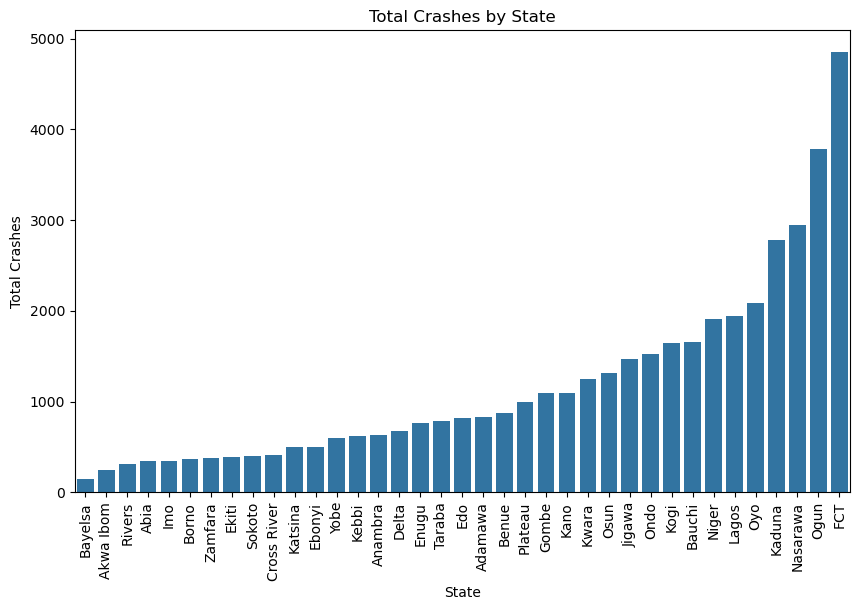

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=crash_by_state.index, y=crash_by_state.values)
plt.xticks(rotation=90)
plt.title('Total Crashes by State')
plt.ylabel('Total Crashes')
plt.xlabel('State')
plt.show()

### Graph 2: Line Plot of Crashes Over Quarter

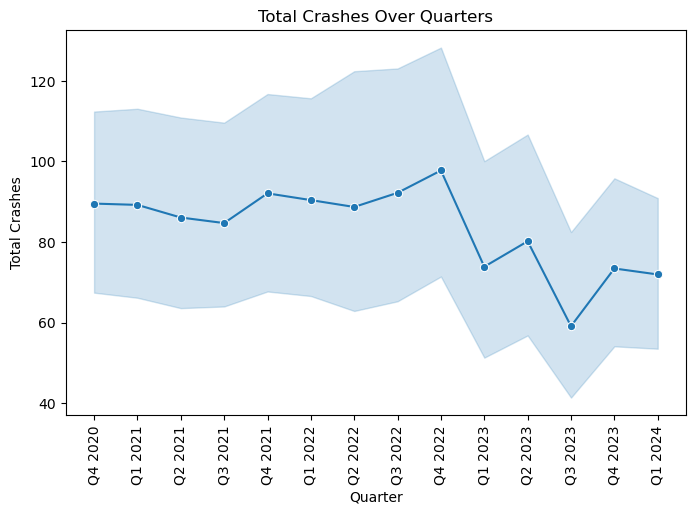

In [14]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Quarter',y='Total_Crashes', data=df, marker='o')
plt.xticks(rotation=90)
plt.title('Total Crashes Over Quarters')
plt.ylabel('Total Crashes')
plt.xlabel('Quarter')
plt.show()

### Graph 3: Correlation Heatmap

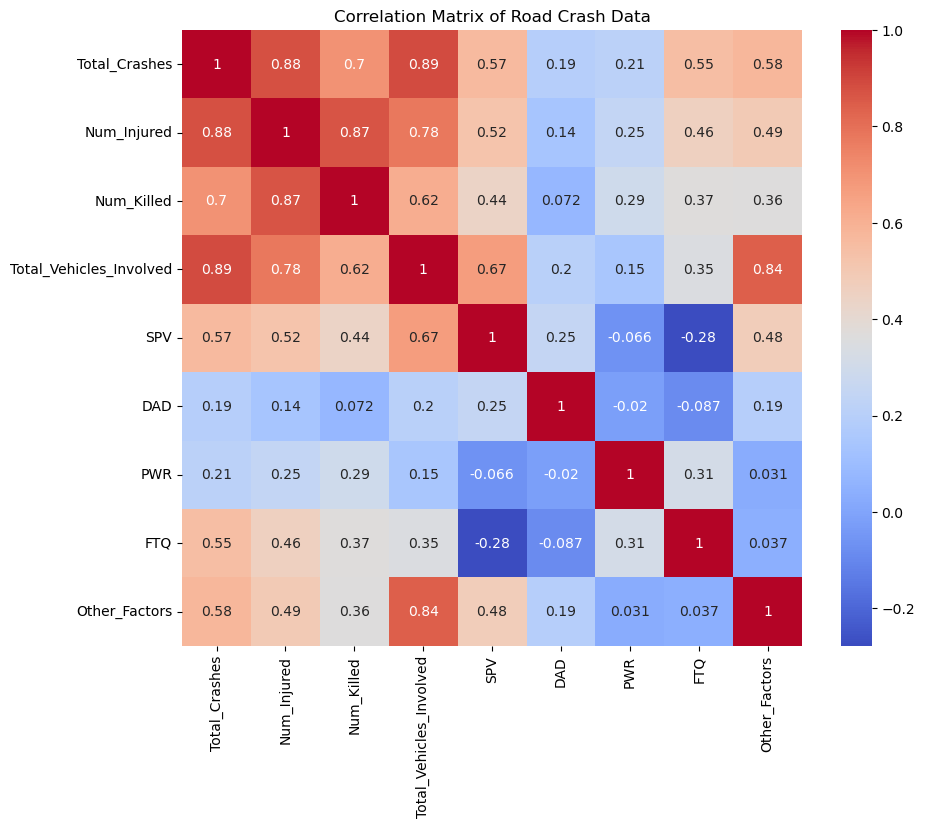

In [16]:
numeric_data= df.select_dtypes(include=[float,int])
numeric_data=numeric_data.dropna()
corr=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Road Crash Data')
plt.show()

### KPI 1: Total Crashes

In [17]:
df['Total_craches']= pd.to_numeric(df['Total_Crashes'],errors='coerce')
df['Total_Crashes']=df['Total_Crashes'].fillna(0)
total_crashes=df['Total_Crashes'].sum()
print(f'Total Crashes: {total_crashes}')

Total Crashes: 43262


### KPI 2: Total Number of Injures

In [18]:
total_injuries =df['Num_Injured'].sum()
print(f'Total Injuries: {total_injuries}')

Total Injuries: 127237


### KPI 3: Average Crashes Per State

In [20]:
avg_crashes_per_state=df.groupby('State')['Total_Crashes'].mean()
avg_crashes_per_state.head() #show the first few states

State
Abia          24.214286
Adamawa       59.214286
Akwa Ibom     17.142857
Anambra       45.285714
Bauchi       118.642857
Name: Total_Crashes, dtype: float64

## Most common contributing factors to road crashes

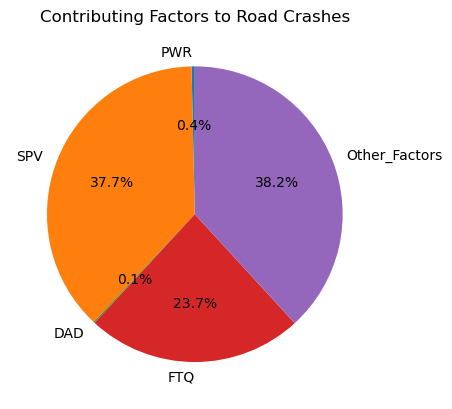

In [24]:
factors=df[['PWR','SPV','DAD','FTQ','Other_Factors']].sum()
factors.plot(kind='pie',autopct='%1.1f%%',startangle=90,title='Contributing Factors to Road Crashes')
plt.show()

## The relationship between the number of vehicles involved and the severity of accidents

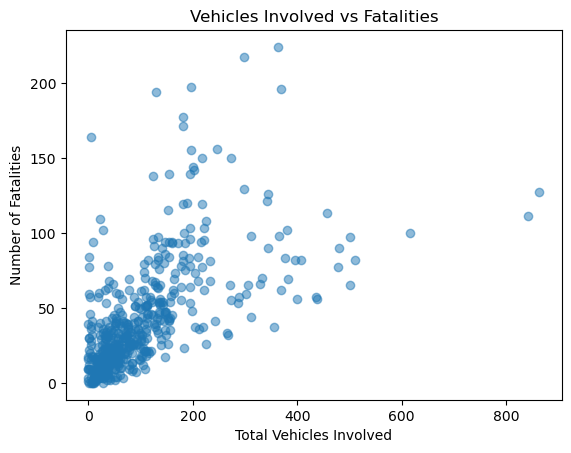

Correlation between vehicles Involved and Fatalities:0.6154088002801272


In [25]:
plt.scatter(df['Total_Vehicles_Involved'],df['Num_Killed'],alpha=0.5)
plt.title('Vehicles Involved vs Fatalities')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Number of Fatalities')
plt.show()

correlation=df['Total_Vehicles_Involved'].corr(df['Num_Killed'])
print(f'Correlation between vehicles Involved and Fatalities:{correlation}')

## The Quarter that has the most accidents

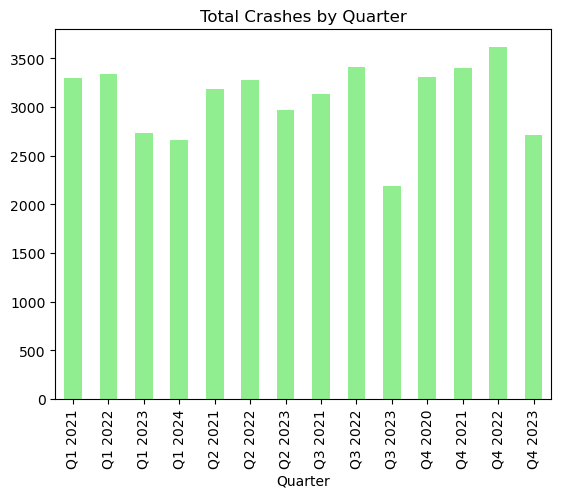

In [26]:
quarter_crashes=df.groupby('Quarter')['Total_Crashes'].sum()
quarter_crashes.plot(kind='bar',color='lightgreen',title='Total Crashes by Quarter')
plt.show()